# Houce Prices Dynamics in King County WA

## Import Necessary Liabraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

## Data

**Source:** Kaggle <br> **Link:** https://www.kaggle.com/datasets/shivachandel/kc-house-data/data <br>**Variables:** 21 (id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15) <br> **Observations:** 21.613 <br> **Period:** 02 May 2014 to 27 May 2015 <br> **Geographic coverage:** King County, including Seattle

In [2]:
# Read the dataset
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

# Get information about the DataFrame, such as column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  


The dataset consists of 21,613 observations (rows) and 21 variables (columns).
The variables include information such as id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, and sqft_lot15.

The id variable appears to be a unique identifier for each observation. All variables structured as numeric/integer except the date variable which is currently stored as a character type. It might be useful to convert it to a date type for time-related analyses. So we will first convert the date variable from character to a date type.

It's important to note that while all variables may be structured as numeric, certain variables, despite their numeric representation, hold categorical significance. These categorical variables are essentially numerically coded to represent different categories or levels within the dataset. This nuance is crucial to consider when interpreting and analyzing the data.


In [4]:
# Convert the 'date' variable to datetime type
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Calculate summary statistics for numerical columns
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


**id**
   - The `id` variable represents a unique identifier for each home sold.

**date**
   - The `date` variable, contains information about the date of the house sale and spans from May 2, 2014, to May 27, 2015.

**price:**
   - The `price` variable is the **dependent variable**   and shows a wide range, with the minimum house price at $75,000 and the maximum at $7,700,000.
   - The median house price is $450,000, and the mean is $540,088.

**bedrooms and bathrooms:**
   - The variables related to the number of bedrooms and bathrooms  (0.5 accounts for a room with a toilet but no shower) exhibit varying ranges and distributions.
   - The number of bedrooms ranges from 0 to 33, with a mean of approximately 3.37.
   - The number of bathrooms ranges from 0 to 8, with a mean of approximately 2.12.

**sqft_living and sqft_lot:**
   - These variables represent the size of houses.
   - `sqft_living` reflects the Square footage of the apartments interior living area, ranging from 290 to 13,540 square feet, with a mean of 2080.
   - `sqft_lot` represents the lot size, ranging from 520 to 1,651,359 square feet, with a mean of 15,107.

**floors**
 -The `floors` variable is represents the levels of the houses. The majority of houses have 1 or 1.5 floors.
   - Notably, there seems to be a common occurrence of houses with 1.5 floors, while the mean is approximately 1.494.
   - This suggests that many houses have a split-level design or additional space on an upper level, contributing to the fractional floor values.

**waterfront:**  
   - The `waterfront` variable is a dummy variable mostly 0 , represents the property has no waterfront view and 1 for with waterfront.

**view and condition:**  
   - `view` represents the overall view rating (0 to 4)  with a mean of 0.23 
   -`condition` represents the overall condition rating (0 to 5) with a mean of 3.41 for `condition`.

**grade:**
   - `grade` represents the overall grade given to the housing unit and ranges from 1 to 13 where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
   
**sqft_above, and sqft_basement:**
   - `sqft_above` and `sqft_basement` show the square footage above ground and is below ground level¶ (in the basement), respectively.

**yr_built, yr_renovated:**
   - Houses were built between 1900 and 2015 (`yr_built`), with the majority built in the mid to late 20th century.
   - `yr_renovated` indicates the last renovation year, with a mean of 84.4 and many zero values, suggesting no renovations.


**Geographical Information (lat, long, zipcode):**
   - `lat` and `long` provide latitude and longitude information of house locations, respectively.
   - `zipcode` represents the zip code of the house location.
   

**sqft_living15 and sqft_lot15:**
   - `sqft_living15` and `sqft_lot15` indicate the living room and lot size in 2015, reflecting potential renovations or changes. (? some sources mention it differently and main source couldnt find !!!)


These summary statistics provide an overview of the distribution and characteristics of each numeric variable in the dataset, with a specific focus on understanding the relationships with the **dependent variable, 'price.'**

### Missing Values

 - Most variables in the dataset have complete data; however, it's worth noting that `sqft_above` has two missing values (NA's).
   - Given the small number of missing values (only two observations) in relation to the overall dataset size, we have decided to remove these specific observations. This decision is based on considering the number of observations and the minimal impact on the overall analysis.
   - Removing these observations ensures that the dataset remains largely complete and is a reasonable approach in this context.

In [17]:
# Check for missing values in each column
missing_values = df.isnull().sum() 

# Filter missing values greater than zero
missing_values_positive = missing_values[missing_values > 0]

# Display the number of  missing values for variable that have missing values
print("#Missing values:")
print(missing_values_positive)

#Missing values:
sqft_above    2
dtype: int64


In [26]:
# Remove observations with missing values in the 'sqft_above' variable
df_cleaned = df.dropna(subset=['sqft_above'])


### Data Exploration

In organizing our variables by type, we enhance the precision of our analysis and visualization methods. This thoughtful categorization enables us to apply tailored techniques to each variable type, ensuring more insightful and nuanced exploration of the dataset.

In [22]:
#efine variables according to their types

# All variables
all_vars = ["id", "bathrooms", "bedrooms", "condition", "date", "feat01", "feat02", "feat03", "feat04", "feat05", "feat06", "feat07", "feat08", "feat09", "feat10", "floors", "grade", "lat", "long", "price", "sqft_above", "sqft_basement", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15", "view", "waterfront", "yr_built", "yr_renovated", "zipcode"]

# Continuous Numeric Variables
cont_vars = ["price", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15", "sqft_above", "sqft_basement"]

# Discrete Numeric Variables
disc_vars = ["bedrooms", "floors", "bathrooms"]

# Categorical Variables
cat_vars = ["waterfront", "view", "condition", "grade"]

# Date Variables
date_vars = ["date", "yr_built", "yr_renovated"]

# Geographical Variables
geo_vars = ["lat", "long", "zipcode"]




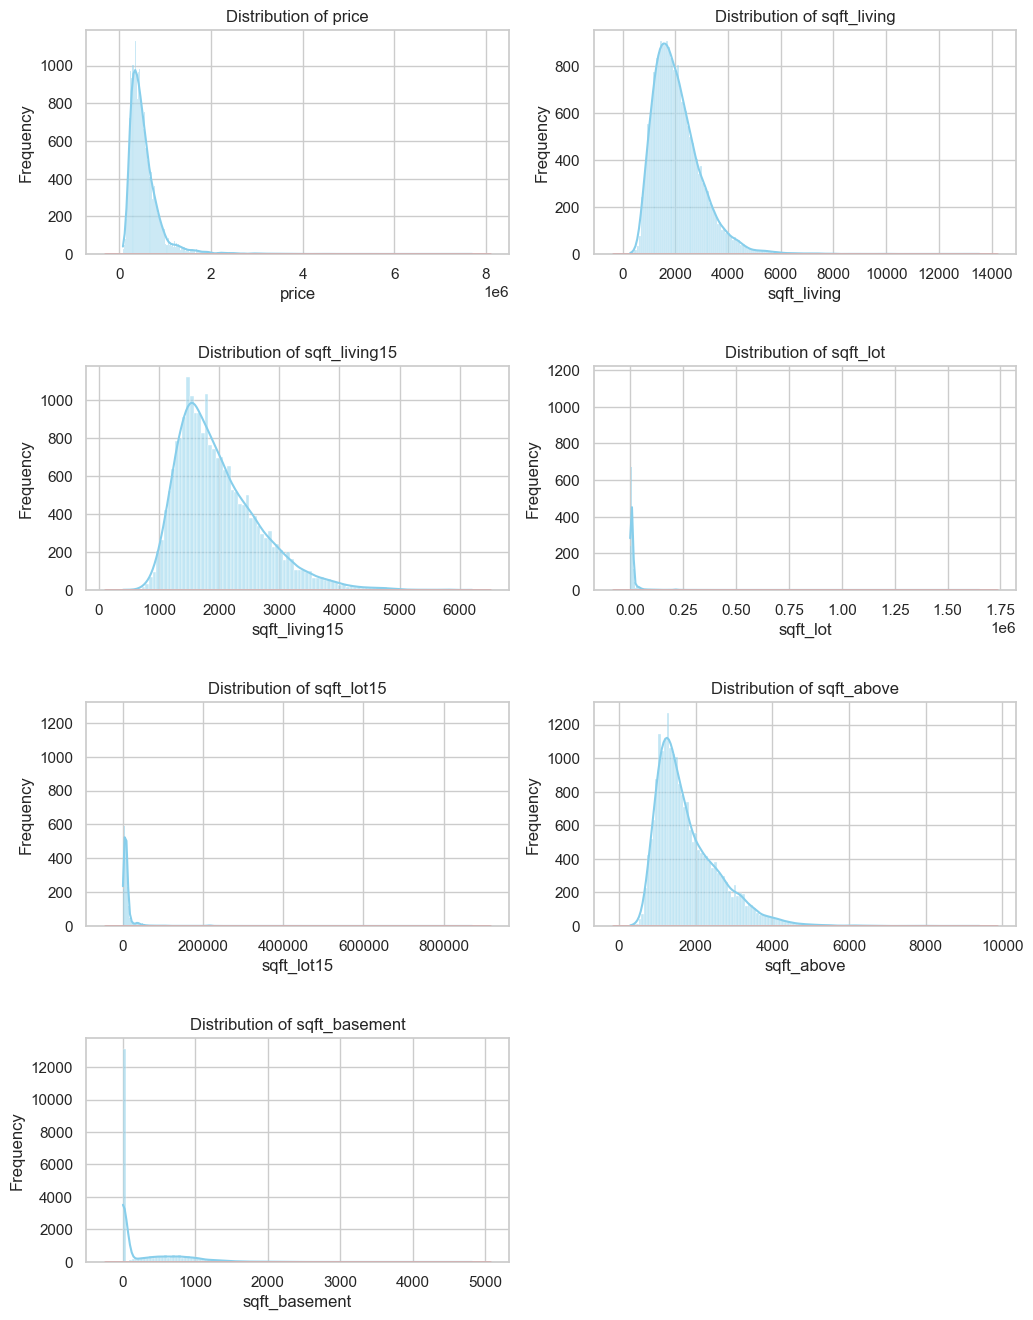

In [30]:

# Set seaborn style
sns.set(style="whitegrid")

# Set up a layout grid
plt.figure(figsize=(12, 16))
plt.subplots_adjust(hspace=0.5)

# Create histograms for numeric variables
for i, cont in enumerate(cont_vars):
    plt.subplot(4, 2, i + 1)
    
    # Plot histogram
    sns.histplot(df_cleaned[cont], kde=True, color='skyblue', bins='auto')
    plt.title(f"Distribution of {cont}")
    plt.xlabel(cont)
    plt.ylabel('Frequency')

    # Plot normal distribution curve
    mu, std = df_cleaned[cont].mean(), df_cleaned[cont].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, color='red', linewidth=2)

# Show the plots
plt.show()